# Tomando contacto con Machine Learning 

# Que es el *Machine Learning*?
 Se entiende  por *machine learning* un una rama concreta de la **Inteligencia Artificial**. En concreto es aquella que trata sobre algoritmos que intentan aprender a base de ejemplos previos. Atendiendo a esto, se puede dividir el *machine learning a su vez en 2 grandes categorías:

## Aprendizaje Supervisado

Se caracteriza por el hecho de que el modelo se entrena utilizando un conjunto de datos etiquetado, lo que significa que se le proporciona información previa sobre las relaciones entre las entradas y las salidas. El objetivo principal del aprendizaje supervisado es aprender una función que pueda mapear las entradas a las salidas de manera precisa.

Dentro de las posibles aproximaciones a su vez en este caso hay dos grandes categorías:

* Clasificación, caracterizada por que a una instancia determinada se le asigna un valor dentro de un conjunto discreto de valores. Así, por ejemplo, dada una lectura de un sensor si un motor falla o no,  o si una imagen contiene un coche, un barco o un avión.
  <img src="https://miro.medium.com/max/828/1*nB6MM2qFvnsCDhSuhNPcLA.webp" alt="Clasificación" width="450"/>
  
* Regresión, es un tipo de problema más ambicioso que el anterior, ya que en este caso también se le asigna un valor a una determinada instancia pero es un valor continuo. Por ejemplo, dada la misma lectura del sensor anterior, dar una probabilidad de fallo del mismo o una estimación del tiempo de vida útil que le queda.
  ![Regresion](https://upload.wikimedia.org/wikipedia/commons/d/da/Gaussianprocess.gif)

## Aprendizaje NO Supervisado
Se diferencia del aprendizaje supervisado en que no requiere un conjunto de datos etiquetado. En lugar de buscar patrones entre las entradas y las salidas conocidas, el aprendizaje no supervisado se enfoca en encontrar patrones y estructuras ocultas en los datos sin etiquetar. Estro que se denomina técnicas de clustering tiene multitud de opciones y aplicaciones, especialmente cuando los ejemplos son caros de obtener.

![Clustering](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/EM_Clustering_of_Old_Faithful_data.gif/640px-EM_Clustering_of_Old_Faithful_data.gif)

## Un poco de vocabulario

 Antes de comenzar con el código, vamos a hablar de algunos términos técnicos. En general los científicos de datos tenemos como en todos los ámbitos una serie de términos que utilizamos para referirnos a muchos unos conceptos determinados. Es por ello que es bueno que conozcáis esos términos:

+ Cada fila del dataset se puede llamar: ejemplo, muestra, instancia, registro, observación, paciente (en problemas biológicos)
+ Cada columna del dataset se puede llamar: predictor, atributo, *feature*, variable independiente, variable de entrada, regresor, covariable
+ En entrenamiento supervisado tenemos una columna que nos informa de la clase a la que pertenece cada ejemplo (en regresión es un valor numérico, ordenado y continuo) y se conoce, habitualmente, con el nombre de: clase, variable de salida, variable dependiente, output. Independientes el nombre que se le haya podido asignar en el dataset en concreto.
+ *Pipeline*, hace referencia al conjunto de pasos que se deben utilizar para conseguir el resultado. Un *pipeline* tipico incluye la fase de preprocesado, modelado y evaluación

En general cada *data scientist* tiene sus preferencias pero en el contexto del curso (y ojo porque dependiendo del tipo de dataset se escaparán otros) usaremos *features*, ejemplos y variable de salida.

Ahora vamos a verlo9 con un ejemplo ya conocido y que se encuentra preparado en la librería, si tenéis curiosidad existen otros ejemplos preparados como son los que podéis encontrar en este [enlace](https://scikit-learn.org/stable/datasets.html)


In [ ]:
from sklearn.datasets import load_iris
from rich import print

dataset_iris = load_iris()
type(dataset_iris)

In [ ]:
print(dataset_iris)

In [ ]:
dataset_iris.target_names

In [ ]:
dataset_iris.target

PREGUNTA: ¿Pero no habíamos dicho que era un problema de clasificación?

In [ ]:
dataset_iris.feature_names

## Pre-requisitos para trabajar con scikit-learn en problemas aprendizaje supervisado
+ Es necesario separar las features de la variable de salida
+ Es necesario que las features y la variable de salida sean valores numéricos
+ Debemos estar seguros de que las features y la variable de salida sesan NumPy arrays
+ Es necesario que las dimensiones coincidan!! ojo a los pre-procesados manuales de vuestros propios datasets!!

In [ ]:
datos = dataset_iris.data
salida = dataset_iris.target

In [ ]:
dataset_iris.data.shape

In [ ]:
dataset_iris.target.shape

In [ ]:
datos.shape

## Nuestro primer modelo! primero uno sencillo. K-nearest neighbors (KNN)

conceptualmente:

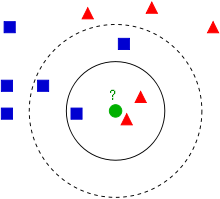

por ser el primero, vamos paso a paso:

**Primer paso:** decirle a scikit-learn que somos perezosos y no queremos programar nada, que mejor usamos su implementación del algoritmo que queremos utilizar (recordad qué ventajas tiene esto)

+ scikit-learn está desarrollado por un equipo de programadores/investigadores que seguro que lo van a hacer muchísimo mejor que nosotros
+ scikit-learn es usado por una comunidad de gente enorme, los errores, bugs, malas implementaciones... se van a detectar mucho mejor que lo podríamos detectar nosotros mismos
+ scikit-learn añade nuevas funcionalidades, métodos, modelos... de acuerdo a lo que se va viendo en el estado del arte. Si nosotros tuviésemos que programar cada modelo, volveríamos a los trabajos de un único modelo analizando un resultado.
+ scikit-learn está optimizado para trabajar con las librerías de cómputo paralelo y gestiona grandes cantidades de dastos de manera muy eficiente
+ scikit-learn tiene código disponible y abierto para consulta. Podemos buscar una función que necesitamos y usarla como base para crear la nuestra propia con las modificaciones que sean necesarias. El código está [aquí](https://github.com/scikit-learn/scikit-learn)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Segundo paso:** crear una instancia del *estimator* (término con el que scikit-learn llama a los modelos. Personalmente, usaré modelo.

In [ ]:
ml_knn = KNeighborsClassifier()

vale.... me esperaba algo más, no sucede nada???

In [ ]:
print(ml_knn)

**OJO** uno de los grandísimos problemas tanto de scikit-learn, como de R o Python es que facilitan y complican la vida de los *data scientist* en igual proporción. Dejan siempre unos parámetros por defecto para que el modelo *funcione* que, o bien no se miran, o bien no se entienden, o bien no se contaba con ellos. Esto puede implicar problemas en la generación de modelos, sobre-ajuste a los datos, conclusiones erróneas, pérdida de tiempo de cómputo....

**Tercer paso:** entrenar el modelo

In [ ]:
ml_knn.fit(datos,salida)

vale.... volvía a esperar algo más, no sucede nada? ya está hecho? tan fácil?

In [ ]:
nueva_flor = [[3,5,4,2]]
ml_knn.predict(nueva_flor)

O incluso se podría predecir el tipo de flor de varias a la vez:

In [ ]:
nuevas_flores = [[3,5,4,2],[4,3,1,0]]
ml_knn.predict(nuevas_flores)

### Ajustemos manualmente el hiperparámetro de KNN

In [ ]:
ml_knn_one = KNeighborsClassifier(n_neighbors=1)
ml_knn_one.fit(datos,salida)
ml_knn_one.predict(nuevas_flores)

este modelo tiene k como hiperparámetro. Pregunta: ¿si quiero saber qué valor de k es el mejor, lo tengo que ir mirando de uno en uno?

## ¿Es difícil usar otro modelo para comparar?
Como hemos dicho con anterioridad, el ecosistema para ML de scikit-learn está bien pensado y diseñado para trabajar, con implementaciones comunes, con todos los modelos de los que dispone. Es por esto que resulta tremendamente fácil generar un nuevo modelo de clasificación.

Otra gran ventaja es que toda la documentacion y el API es completamente común entre los diferentes modelos, ver [ejemplo](https://scikit-learn.org/stable/)

En Python es posible hacer el entrenamiento y la predicción en una única línea de código.

In [ ]:
from sklearn.naive_bayes import GaussianNB
ml_gnb = GaussianNB()
ml_gnb.fit(datos, salida).predict(nuevas_flores)